## `Анализа на маркетинг податоци во банкарството`

Анализата на маркетинг податоците на организацијата е една од најтипичните апликации на data science и машинското учење.
Ваквата анализа дефинитивно придонесува за подобрување на перформансите на маркетинг кампањите, како и за намалување на трошоците. Во принцип, маркетинг податоците може да се користат за две различни деловни цели:

   - Предвидување на резултатите од маркетинг кампањата за секој клиент и појаснување на факторите кои влијаат на резултатите од кампањата. Овој пристап помага да се дознаат начините како да се направат маркетинг кампањите поефикасни.

   - Откривање на сегменти на клиенти преку користење податоци за клиенти кои орочиле депозити/купиле производ. Ова помага да се идентификува профилот на клиентот, за кој има поголема веројатност да го купи производот и да се развие детално таргетирана маркетинг кампања.

Орочените депозити се еден од главните извори на средства за банката. Банката има различни можности за продажба на орочени депозити на своите клиенти, како што се e-mail маркетинг, реклами, телефонски маркетинг и дигитален маркетинг. Телефонските маркетинг кампањи сè уште остануваат еден од најефикасните начини да се допре до луѓето. Сепак, тие бараат огромни инвестиции бидејќи се ангажираат големи call центри за да ги реализираат овие кампањи. Оттука, од клучно значење е претходно да се идентификуваат клиентите кои најверојатно би направиле депозит, за да можат да бидат контактирани преку повик. 
Овој датасет содржи податоци од маркетинг кампања, спроведена од страна на една банка. Маркетиншката кампања била реализирана преку телефонски повици. Честопати, требало да се упатат повеќе од еден повик до еден клиент пред да одбие или да се согласи да орочи депозит.
 
Нашата задача е да ги одредиме карактеристиките на потенцијалниот клиент кој ќе сака да направи депозит во банката.  Целта е да создадеме модел користејќи кластерирање, со кој ќе одредиме приближен опис на клиент, на кој оваа кампања ќе даде најдобар резултат. На тој начин можеме да направиме подобар избор на група клиенти, кои можат да бидат таргетирани со маркетинг кампањата.

## `Презентирање на податоците и цели`

Целта на овој проект е да се идентификуваат кластери во рамки на податоците, со помош на кои ќе се одредат потенцијални клиенти и кои понатаму ќе бидат таргетирани од идни маркетинг кампањи. Податоците користени во овој проект содржат информации за клиентите како што се: возраст, занимање, брачен статус, ниво на образование, како и податоци кои се поврзани со нивниот банкарски статус и исходот од претходните маркетинг кампањи, доколку биле контактирани. Во датасетот не недостасуваа податоци, но во дел од колоните идентификувавме "outlier" вредности, кои беа предмет на понатамошна анализа.
Варијаблите во податоците се следните:

    ●age: Возраст на клиентот;
    ●job: Занимање на клиентот;
    ●marital: Брачен статус на клиентот;
    ●education: Ниво на образование;
    ●default: Дали клиентот има кредит кој не е во можност да го врати (банкрот);
    ●housing:  Дали клиентот има станбен кредит;
    ●loan: Дали клиентот има потрошувачки кредит;
    ●balance: Состојба на сметка на клиентот во долари;
    ●contact: На кој начин била воспоставена комуникација со клиентот;
    ●month: Последниот месец во кој клиентот бил контактиран;
    ●day: Последниот ден во месецот, во кој клиентот бил контактиран;
    ●duration: Времетраење на последниот повик со клиентот;
    ●campaign: Колку пати бил контактиран клиентот, во рамки на оваа кампања;
    ●pdays: Број на денови што поминале откако клиентот бил контактиран, во рамки на претходната кампања 
    (доколку бил контактиран);
    ●previous: Колку пати бил контактиран клиентот, во рамки на претходната кампања (доколку бил контактиран);
    ●poutcome: Исход од претходната кампања (дали била успешна);

Прво ги импортираме потребните библиотеки и ја исчитуваме датата како 'pandas dataframe'.

In [21]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from pandas.core.common import SettingWithCopyWarning
import matplotlib

In [22]:
pd.set_option('display.max_columns', None)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.filterwarnings('ignore')

In [23]:
data = pd.read_csv('bankdataset.csv')
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [25]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [26]:
#Проверка дали има податоци кои недостасуваат
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [27]:
#Проверка дали некој од редовите се повторуваат
data.duplicated().sum()

0

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

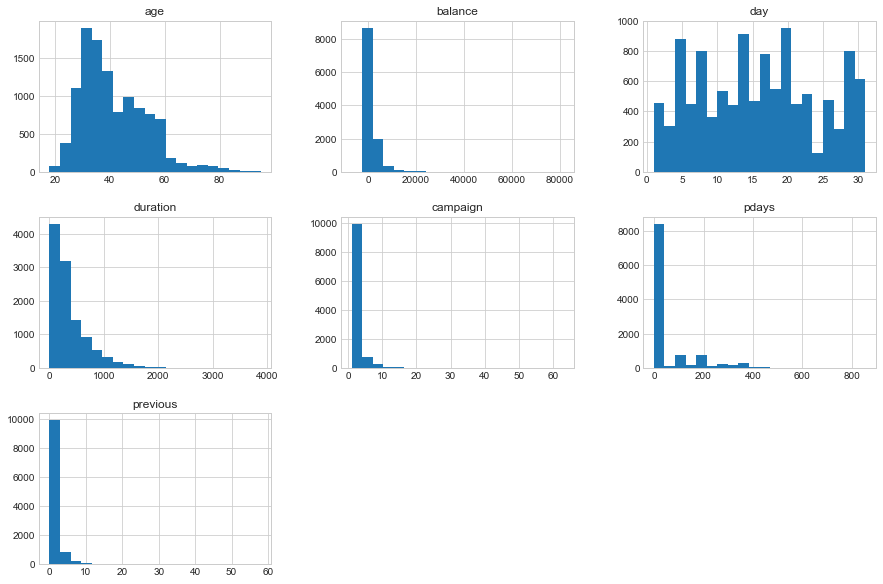

In [28]:
#За полесна визуелизација ги делиме варијаблите на нумерички категорички

#Нумерички варијабли
num_var=data.select_dtypes([np.number]).columns
print(num_var)

#Категорички варијабли
cat_var=data.drop(num_var, axis=1)

#Визуелизација на нумеричките варијабли
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
data[num_var].hist(bins=20, figsize=(15,10))

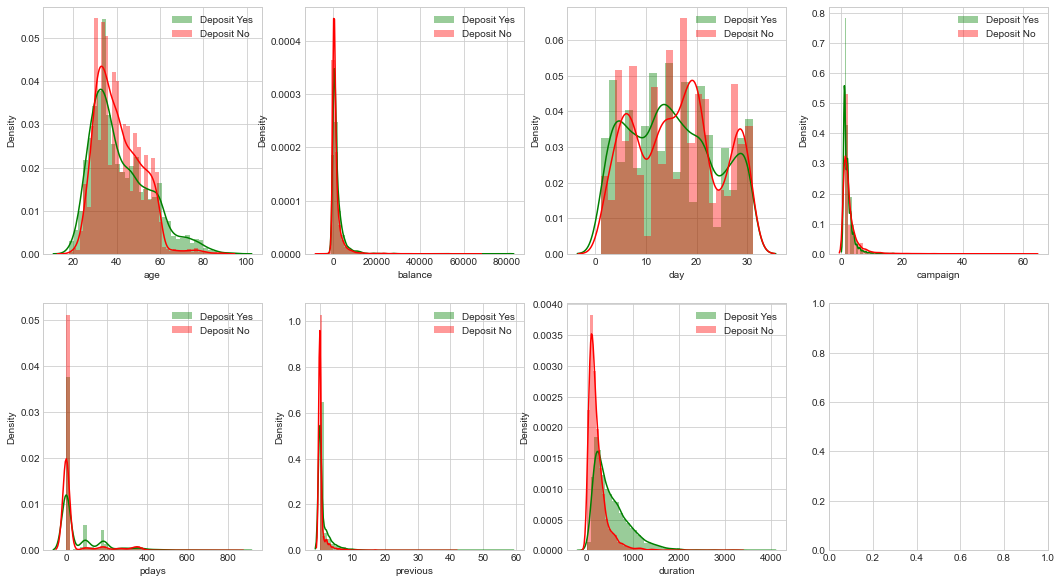

In [29]:
#Дистрибуција на нумеричките варијабли, поделени според тоа дали оставиле депозит или не
figure, axis = plt.subplots(2, 4, figsize = (18,10))
sns.distplot(data[data.deposit=='yes']['age'], label='Deposit Yes', color='green',ax=axis[0,0])
sns.distplot(data[data.deposit=='no']['age'], label='Deposit No', color='red',ax=axis[0,0])
axis[0,0].legend()
sns.distplot(data[data.deposit=='yes']['balance'], label='Deposit Yes', color='green',ax=axis[0,1])
sns.distplot(data[data.deposit=='no']['balance'], label='Deposit No', color='red',ax=axis[0,1])
axis[0,1].legend()
sns.distplot(data[data.deposit=='yes']['day'], label='Deposit Yes', color='green',ax=axis[0,2])
sns.distplot(data[data.deposit=='no']['day'], label='Deposit No', color='red',ax=axis[0,2])
axis[0,2].legend()
sns.distplot(data[data.deposit=='yes']['campaign'], label='Deposit Yes', color='green',ax=axis[0,3])
sns.distplot(data[data.deposit=='no']['campaign'], label='Deposit No', color='red',ax=axis[0,3])
axis[0,3].legend()
sns.distplot(data[data.deposit=='yes']['pdays'], label='Deposit Yes', color='green',ax=axis[1,0])
sns.distplot(data[data.deposit=='no']['pdays'], label='Deposit No', color='red',ax=axis[1,0])
axis[1,0].legend()
sns.distplot(data[data.deposit=='yes']['previous'], label='Deposit Yes', color='green',ax=axis[1,1])
sns.distplot(data[data.deposit=='no']['previous'], label='Deposit No', color='red',ax=axis[1,1])
axis[1,1].legend()
sns.distplot(data[data.deposit=='yes']['duration'], label='Deposit Yes', color='green',ax=axis[1,2])
sns.distplot(data[data.deposit=='no']['duration'], label='Deposit No', color='red',ax=axis[1,2])
axis[1,2].legend()

Краток опис на најважните варијабли:

- `Age` варијаблата има опсег на клиенти од 18 до 95 години, со медијална старост од 41. Како што е покажано на дистрибуцијата на графикот, најголемиот дел од клиентите се со старост од 30 до 50 години. Постојат и две помали групи на клиенти кои се на возраст пониска од 22 години и над 60 години ;

- `Balance` варијаблата во датасетот е во ранг од -6800 до 81000. Само 6% од клиентите имаат негативно салдо на сметка. Од друга страна над 72% имаат состојба пониска од 1500 долари;

- `Duration` Времетраењето на телефонските разговори се движи од 1 минута до 1 час. 80% од повиците траеле до 10 минути;


<AxesSubplot:xlabel='poutcome', ylabel='count'>

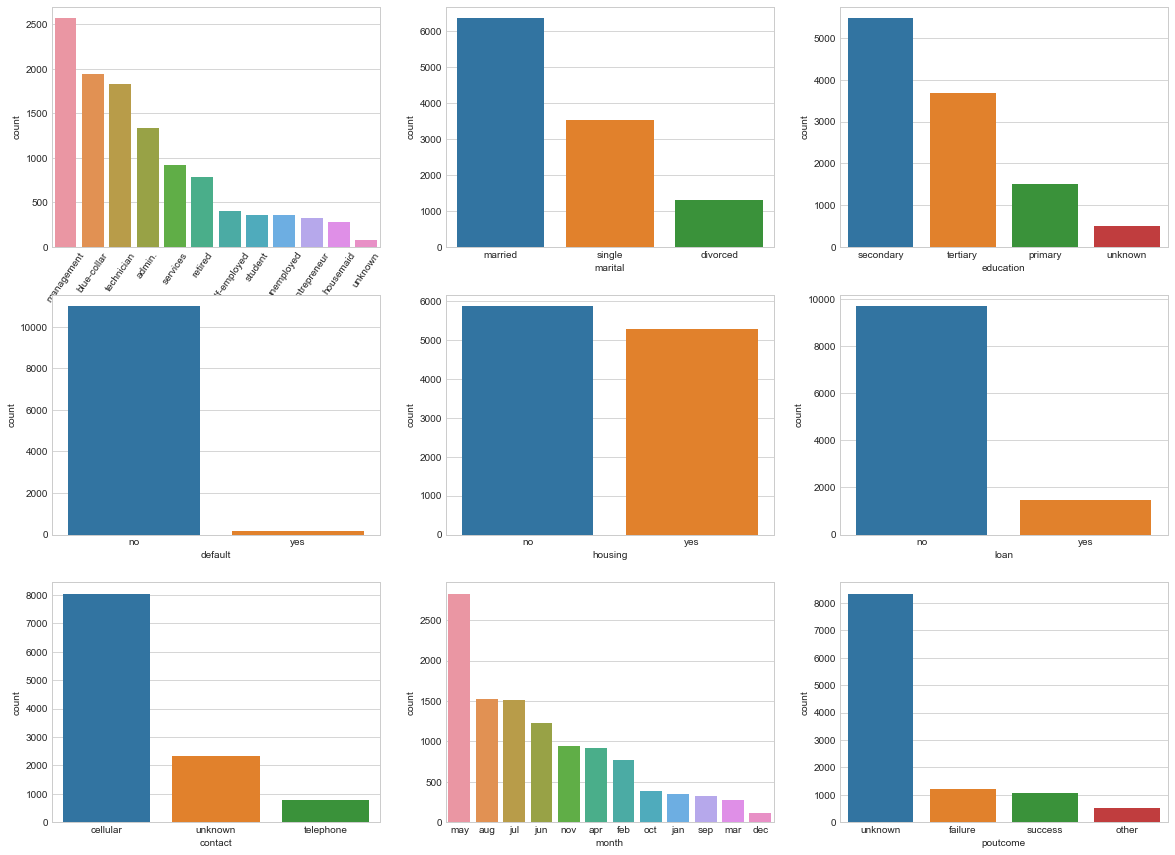

In [144]:
#Визуелизација на категоричките варијабли

figure, axis = plt.subplots(3, 3, figsize = (20,15))
sns.countplot(data['job'],order = data['job'].value_counts().index,ax=axis[0,0])
axis[0,0].tick_params(axis='x', rotation=55)
sns.countplot(data['marital'],order = data['marital'].value_counts().index,ax=axis[0,1])
sns.countplot(data['education'],order = data['education'].value_counts().index,ax=axis[0,2])
sns.countplot(data['default'],order = data['default'].value_counts().index,ax=axis[1,0])
sns.countplot(data['housing'],order = data['housing'].value_counts().index,ax=axis[1,1])
sns.countplot(data['loan'],order = data['loan'].value_counts().index,ax=axis[1,2])
sns.countplot(data['contact'],order = data['contact'].value_counts().index,ax=axis[2,0])
sns.countplot(data['month'],order = data['month'].value_counts().index,ax=axis[2,1])
sns.countplot(data['poutcome'],order = data['poutcome'].value_counts().index,ax=axis[2,2])

<AxesSubplot:xlabel='poutcome', ylabel='count'>

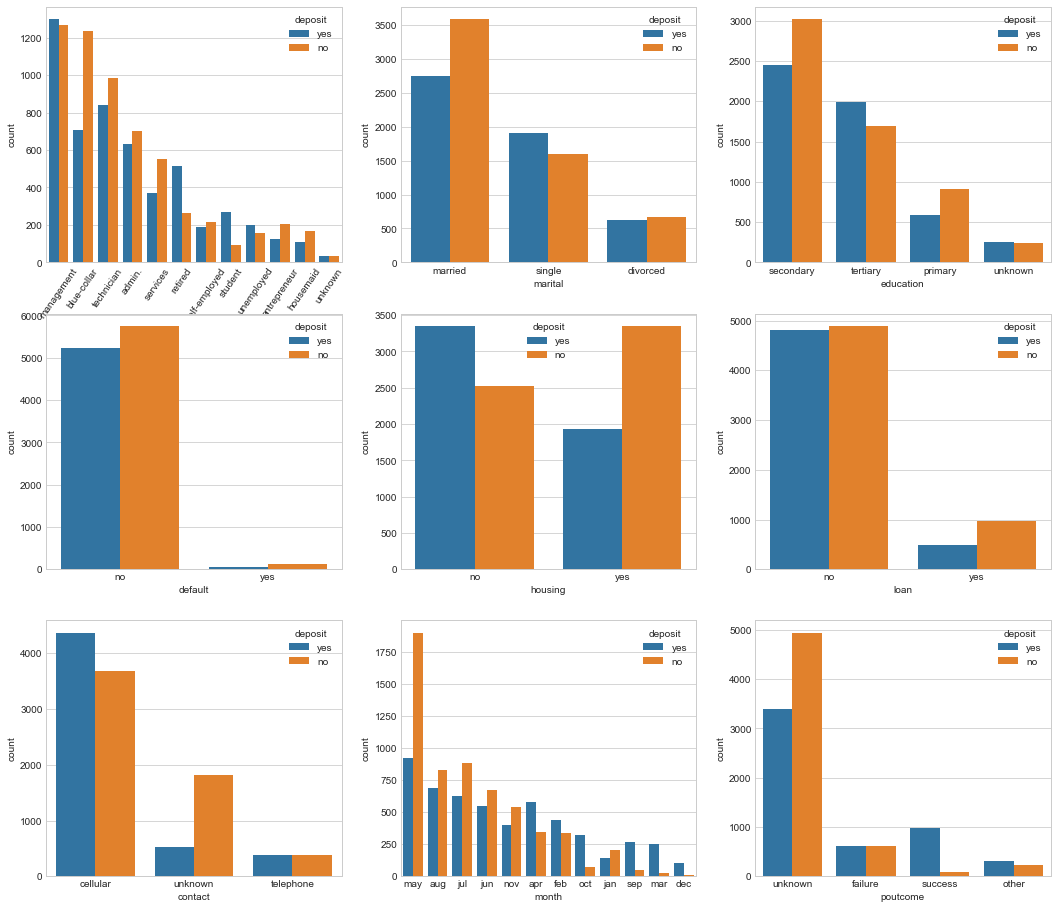

In [142]:
#Дистрибуција на категоричките варијабли, поделени според тоа дали оставиле депозит или не
figure, axis = plt.subplots(3, 3, figsize = (18,16))
sns.countplot(data['job'],order = data['job'].value_counts().index,hue=data.deposit,ax=axis[0,0])
axis[0,0].tick_params(axis='x', rotation=55)
sns.countplot(data['marital'],order = data['marital'].value_counts().index,hue=data.deposit,ax=axis[0,1])
sns.countplot(data['education'],order = data['education'].value_counts().index,hue=data.deposit,ax=axis[0,2])
sns.countplot(data['default'],order = data['default'].value_counts().index,hue=data.deposit,ax=axis[1,0])
sns.countplot(data['housing'],order = data['housing'].value_counts().index,hue=data.deposit,ax=axis[1,1])
sns.countplot(data['loan'],order = data['loan'].value_counts().index,hue=data.deposit,ax=axis[1,2])
sns.countplot(data['contact'],order = data['contact'].value_counts().index,hue=data.deposit,ax=axis[2,0])
sns.countplot(data['month'],order = data['month'].value_counts().index,hue=data.deposit,ax=axis[2,1])
sns.countplot(data['poutcome'],order = data['poutcome'].value_counts().index,hue=data.deposit,ax=axis[2,2])

Краток опис на најважните варијабли:

- `Jobs`- Во овој датасет клиентите се поделени во 12 типови на занимања. Речиси 70% на клиентите се распределени во 4 типа на занимања, a тие се: management, blue-collar, tehnician и administration.


- `Married`- 55% се во брак, што е малку над половина.


- `Еducation`- Најголемиот дел од клиентите се со секундарно ниво на образование. Речиси 50% се со ова ниво на образование. Сумарно гледано, 83% од клиентите имаат барем второ ниво на образование. 


- `Housing`- На столбестиот дијаграм се гледа дека распределбата е речиси еднаква помеѓу оние кои имаат станбен кредит и оние кои немаат. Но, има јасна поврзаност помеѓу оваа и таргет варијаблата. Луѓето кои имаат станбен кредит, не вложиле во депозит и обратно.


- `Deposit`- Е таргет варијаблата. Од сите клиенти во оваа кампања 53,47% не орочиле средства во банката.  

Со цел да направиме понатамошни анализи, но и да ги подготвиме податоците за моделирање, неопходно е категоричките варијабли да бидат претставени во нумерички формат. За таа цел користевме `Label Encoder` за сите варијабли кои се во Yes/No формат, a за трансформирање на останатите варијабли користевме `One hot encoding`.

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#креираме втор датасет со енкодирани варијабли
df=data.copy()
df.deposit=le.fit_transform(df.deposit)
df.housing=le.fit_transform(df.housing)
df.loan=le.fit_transform(df.loan)
df.default=le.fit_transform(df.default)

age         0.034901
default    -0.040680
balance     0.081129
housing    -0.203888
loan       -0.110580
day        -0.056326
duration    0.451919
campaign   -0.128081
pdays       0.151593
previous    0.139867
deposit     1.000000
Name: deposit, dtype: float64


Text(0.5, 1.0, 'Корелација на варијаблите')

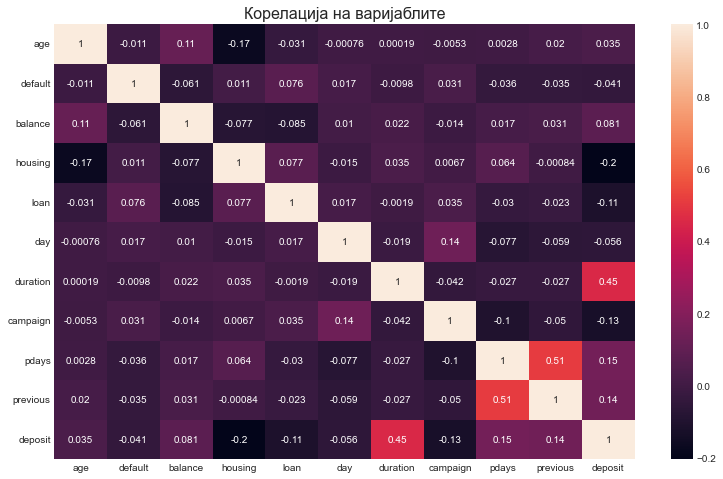

In [33]:
#Испитување на корелација и heat map
print(df.corr()['deposit'])
#Немаме позначајни корелации
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(), annot=True)
plt.title('Корелација на варијаблите',size=16)

<AxesSubplot:xlabel='deposit', ylabel='previous'>

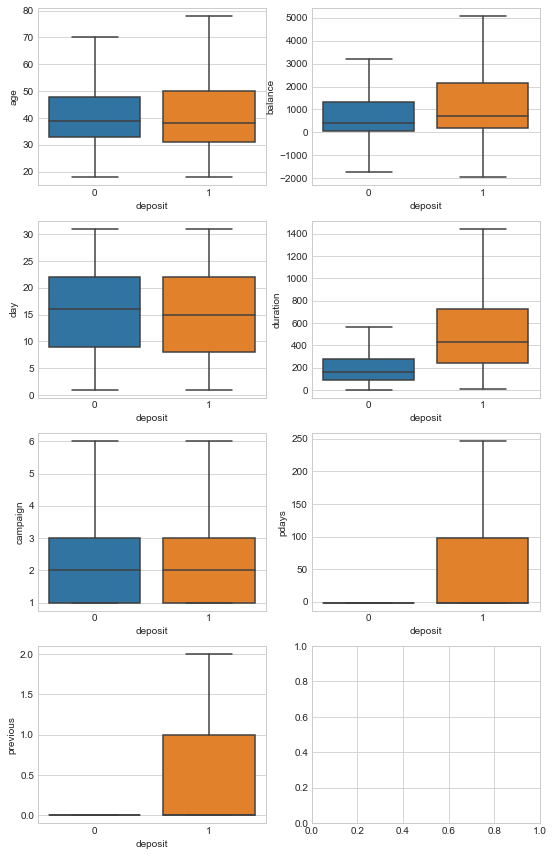

In [98]:
#Дополнителна визуелизација со boxplots на варијаблите и таргетот
figure, axis = plt.subplots(4, 2, figsize = (9,15))
sns.boxplot(x='deposit',y='age',data=df,showfliers=False,ax=axis[0,0])
sns.boxplot(x='deposit',y='balance',showfliers=False,data=df,ax=axis[0,1])
sns.boxplot(x='deposit',y='day',showfliers=False,data=df,ax=axis[1,0])
sns.boxplot(x='deposit',y='duration',showfliers=False,data=df,ax=axis[1,1])
sns.boxplot(x='deposit',y='campaign',showfliers=False,data=df,ax=axis[2,0])
sns.boxplot(x='deposit',y='pdays',showfliers=False,data=df,ax=axis[2,1])
sns.boxplot(x='deposit',y='previous',showfliers=False,data=df,ax=axis[3,0])

In [35]:
#Трансформација на варијаблите со 'One hot encoding'
dummy_cat=pd.get_dummies(df[['job', 'marital', 'education', 'contact', 'month', 'poutcome']], drop_first=True)
df.drop(cat_var, axis=1, inplace=True)
df=df.join(dummy_cat)

## `Data Preprocesing` 

Во делот на процесирање на податоците, го одбравме следниот пристап: 

Креиравме посебни датасетови и во секој направивме различна обработка. Датасетовите се следни:

   1.`Drop outliers`- во овој датасет одбравме целосно да ги отстраниме податоците кои беа "outliers". Нив ги дефиниравме на следниот начин: сите податоци кои беа под првиот квантил (помножено по 1.5 по интеркварталната разлика) и сите податоци кои беа над третиот квантил (помножено по 1.5 по интеркварталната разлика)
    
   2.`Mean imputation` - наместо да ги отстраниме податоците кои беа "outliers", нив ги заменивме со просечните вредности за секоја варијабла соодветно.
    
   3.`Gaussian-approximation`- кај овој датасет решивме "outlier" податоците да ги замениме со вредностите на првиот и третиот квантил, во зависност од тоа која вредност ја имаа.
    
   4.`Transformed data`- овде го променивме пристапот, односно воопшто не ги третиравме "outlier" податоците, туку користевме методи за трансформација/нормализација на податоците. Користени беа следните техники:
   
        - Standard Scaler
        - MinMax Scaler
        - Логаритмирање
        - Реципрочна трансформација
        - Power transformation
        - Quantile Transformation
По трансформирањето на варијаблите, користевме Логистичка регресија, за да го видиме ефектот.
        
   5.`Normal data` - на крај решивме да имаме и еден датасет, во кој нема да бидат извршени никакви трансформации и корекции.
   
Вака подготвените сетови, ги тестиравме со помош на различни модели и методи. Целта беше да видиме кој сет на податоци ќе има најдобар перформанс и со тој да продолжиме кон финалниот модел.  

    

## `Одбирање на оптимален датасет`

Во овој дел ги одбравме следните модели:

    - Ridge Класификација
    - Логистичка Регресија
    - Random Forrest Класификација
    - XGBClassifier
Одбраните модели ги оптимизиравме со помош на Gridsearch и CrosValidation. По направената оптимизација, податоците ги сумиравме во табела `results`

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score      
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import multiprocessing

Оптимизирање на RidgeClassifier 

    - ги користиме влезните параметри : alpha и fit_intercept

In [76]:
def model (data,dataname):
    y=data['deposit']
    X=data.drop(columns='deposit')    
    d=[]
    ridge = RidgeClassifier()
    
    
    for model in [ridge]:
        print(dataname)
        if model == ridge:
            
            param_grid = {'alpha': np.linspace(1,2,20).astype(float) , 
                      "fit_intercept": [True, False]}            
            ridge_grid = GridSearchCV((ridge), param_grid, scoring="accuracy",cv=10)
            ridge_grid.fit(X,y)
            cv_results = sum(cross_val_score(ridge_grid.best_estimator_, X, y, cv=10))/10
            print(str(model), 'best parameters: ', ridge_grid.best_params_,)
            print(str(model), 'best estimator: ', ridge_grid.best_estimator_,)
            d.append([str(dataname),str(model),cv_results,str(ridge_grid.best_params_),str(ridge_grid.best_estimator_)])        

    return pd.DataFrame(d,columns=["dataname",'model','cv_results','best_params','best_estimator_'])

In [77]:
datasets=[df_drop, df_mean, df_gaus, df, df_transform]
datanames=['Drop outliers','Mean imputation', 'Gaussian-approximation', 'Normal data', "Transformed data"]
R = pd.DataFrame()
for d,dname in zip(datasets,datanames):
    R = pd.concat((R, model(d, dname)))

Drop outliers
RidgeClassifier() best parameters:  {'alpha': 1.7894736842105263, 'fit_intercept': False}
RidgeClassifier() best estimator:  RidgeClassifier(alpha=1.7894736842105263, fit_intercept=False)
Mean imputation
RidgeClassifier() best parameters:  {'alpha': 1.1578947368421053, 'fit_intercept': False}
RidgeClassifier() best estimator:  RidgeClassifier(alpha=1.1578947368421053, fit_intercept=False)
Gaussian-approximation
RidgeClassifier() best parameters:  {'alpha': 1.0, 'fit_intercept': False}
RidgeClassifier() best estimator:  RidgeClassifier(fit_intercept=False)
Normal data
RidgeClassifier() best parameters:  {'alpha': 1.9473684210526314, 'fit_intercept': False}
RidgeClassifier() best estimator:  RidgeClassifier(alpha=1.9473684210526314, fit_intercept=False)
Transformed data
RidgeClassifier() best parameters:  {'alpha': 1.4736842105263157, 'fit_intercept': False}
RidgeClassifier() best estimator:  RidgeClassifier(alpha=1.4736842105263157, fit_intercept=False)


In [78]:
R.sort_values("cv_results")

,dataname,model,cv_results,best_params,best_estimator_
0,Mean imputation,RidgeClassifier(),0.764747,"{'alpha': 1.1578947368421053, 'fit_intercept':...","RidgeClassifier(alpha=1.1578947368421053, fit_..."
0,Normal data,RidgeClassifier(),0.778362,"{'alpha': 1.9473684210526314, 'fit_intercept':...","RidgeClassifier(alpha=1.9473684210526314, fit_..."
0,Gaussian-approximation,RidgeClassifier(),0.786065,"{'alpha': 1.0, 'fit_intercept': False}",RidgeClassifier(fit_intercept=False)
0,Transformed data,RidgeClassifier(),0.790544,"{'alpha': 1.4736842105263157, 'fit_intercept':...","RidgeClassifier(alpha=1.4736842105263157, fit_..."
0,Drop outliers,RidgeClassifier(),0.807621,"{'alpha': 1.7894736842105263, 'fit_intercept':...","RidgeClassifier(alpha=1.7894736842105263, fit_..."


Оптимизирање на Логистичка Регресија

    - ги користиме влезните параметри : penalty, C, fit_intercept

In [80]:
def model (data,dataname):
    X=data.drop('deposit',axis=1)
    y=data.drop(X,axis=1)
    d=[]
    Log = LogisticRegression()
    for model in [Log]:
        if model == Log:
            #Parameters
            param_grid = {'penalty': ['l1', 'l2'] ,'C':np.logspace(-4, 4, 12),"fit_intercept": [True, False]}                          
            #Gridsearch                                                    
            log_grid = GridSearchCV((Log), param_grid, scoring="accuracy",cv=10)
            log_grid.fit(X,y)
            #CrosValidation
            cv_results = sum(cross_val_score(log_grid.best_estimator_, X, y, cv=10))/10
            #Dataframe with the results            
            d.append([str(dataname),str(model),cv_results,str(log_grid.best_params_),str(log_grid.best_estimator_)])        

    return pd.DataFrame(d,columns=["dataname",'model','cv_results','best_params','best_estimator_'])

In [81]:
datasets=[df_drop, df_mean, df_gaus, df, df_transform]
datanames=['Drop outliers','Mean imputation', 'Gaussian-approximation', 'Normal data', "Transformed data"]
L = pd.DataFrame()
for d,dname in zip(datasets,datanames):
    L = pd.concat((L, model(d, dname)))

L.sort_values("cv_results")

,dataname,model,cv_results,best_params,best_estimator_
0,Mean imputation,LogisticRegression(),0.772536,"{'C': 1873.8174228603868, 'fit_intercept': Tru...",LogisticRegression(C=1873.8174228603868)
0,Gaussian-approximation,LogisticRegression(),0.783361,"{'C': 0.43287612810830617, 'fit_intercept': Tr...",LogisticRegression(C=0.43287612810830617)
0,Normal data,LogisticRegression(),0.785421,"{'C': 12.32846739442066, 'fit_intercept': Fals...","LogisticRegression(C=12.32846739442066, fit_in..."
0,Transformed data,LogisticRegression(),0.790811,"{'C': 0.01519911082952933, 'fit_intercept': Fa...","LogisticRegression(C=0.01519911082952933, fit_..."
0,Drop outliers,LogisticRegression(),0.797669,"{'C': 2.310129700083158, 'fit_intercept': Fals...","LogisticRegression(C=2.310129700083158, fit_in..."


Оптимизирање на Random Forrest

- ги користиме влезните параметри: n_estimators ,criterion, max_depth, ccp_alpha

In [83]:
def model (data,dataname):
    X=data.drop('deposit',axis=1)
    y=data.drop(X,axis=1)
    d=[]
    rfc = RandomForestClassifier()    
    for model in [rfc]:
        if model == rfc:
            #Parameters
            param_grid={'n_estimators': np.linspace(20,35,8).astype(int),                       
                        'criterion':("gini", "entropy"),
                        'max_depth':np.linspace(15,30,5).astype(int),
                        "ccp_alpha":np.linspace(0,0.5,5).astype(float)}
            #Gridsearch
            rfc_grid = GridSearchCV((rfc), param_grid, scoring="accuracy",cv=5)
            rfc_grid.fit(X,y)
            #CrosValidation
            cv_results = sum(cross_val_score(rfc_grid.best_estimator_, X, y, cv=5))/5
            #Dataframe with the results
            d.append([str(dataname),str(model),cv_results,str(rfc_grid.best_params_),str(rfc_grid.best_estimator_)]) 

        return pd.DataFrame(d,columns=["dataname",'model','cv_results','best_params','best_estimator_'])

In [84]:
datasets=[df_drop, df_mean, df_gaus, df, df_transform]
datanames=['Drop outliers','Mean imputation', 'Gaussian-approximation', 'Normal data', "Transformed data"]
RF = pd.DataFrame()
for d,dname in zip(datasets,datanames):
    RF = pd.concat((RF, model(d, dname)))

RF.sort_values("cv_results")

,dataname,model,cv_results,best_params,best_estimator_
0,Mean imputation,RandomForestClassifier(),0.774338,"{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_d...","RandomForestClassifier(max_depth=22, n_estimat..."
0,Drop outliers,RandomForestClassifier(),0.792423,"{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_d...","RandomForestClassifier(max_depth=26, n_estimat..."
0,Gaussian-approximation,RandomForestClassifier(),0.798343,"{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_d...","RandomForestClassifier(max_depth=15, n_estimat..."
0,Transformed data,RandomForestClassifier(),0.798344,"{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_d...","RandomForestClassifier(max_depth=22, n_estimat..."
0,Normal data,RandomForestClassifier(),0.799866,"{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_d...","RandomForestClassifier(max_depth=30, n_estimat..."


Оптимизирање на XGBClassifier

-ги користиме влезните параметри : min_child_weight, gamma, colsample_bytree, max_depth ,subsample

In [134]:
def model (data,dataname):
    X=data.drop('deposit',axis=1)
    y=data.drop(X,axis=1)
    d=[]
    xgb = XGBClassifier(verbosity = 0)
    
    for model in [xgb]:
        if model == xgb:
            #Parameters
            param_grid = {'min_child_weight': [4, 5, 6],
                      'gamma': [0.002,0.02,0.2],
                      'colsample_bytree': [0.2,0.4,0.6],
                      'max_depth': np.linspace(10,20,3).astype(int),
                      'subsample': [0.4,0.6, 0.8]}
            #Gridsearch
            xgb_grid = GridSearchCV(xgb, param_grid, cv=3,n_jobs= -1)
            xgb_grid.fit(X,y)
            #CrosValidation
            cv_results =sum(cross_val_score(xgb_grid.best_estimator_, X, y, cv=3))/3
            #Dataframe with the results
            d.append([str(dataname),str(model),cv_results,str(xgb_grid.best_params_),str(xgb_grid.best_estimator_)])
        
    return pd.DataFrame(d,columns=["dataname",'model','cv_results','best_params','best_estimator_'])

In [135]:
datasets=[df_drop, df_mean, df_gaus, df, df_transform]
datanames=['Drop outliers','Mean imputation', 'Gaussian-approximation', 'Normal data', "Transformed data"]
XGB = pd.DataFrame()
for d,dname in zip(datasets,datanames):
    XGB = pd.concat((XGB, model(d, dname)))

XGB.sort_values("cv_results")

,dataname,model,cv_results,best_params,best_estimator_
0,Mean imputation,"XGBClassifier(base_score=None, booster=None, c...",0.802458,"{'colsample_bytree': 0.6, 'gamma': 0.002, 'max...","XGBClassifier(base_score=0.5, booster='gbtree'..."
0,Gaussian-approximation,"XGBClassifier(base_score=None, booster=None, c...",0.807654,"{'colsample_bytree': 0.6, 'gamma': 0.02, 'max_...","XGBClassifier(base_score=0.5, booster='gbtree'..."
0,Drop outliers,"XGBClassifier(base_score=None, booster=None, c...",0.808752,"{'colsample_bytree': 0.6, 'gamma': 0.02, 'max_...","XGBClassifier(base_score=0.5, booster='gbtree'..."
0,Transformed data,"XGBClassifier(base_score=None, booster=None, c...",0.809804,"{'colsample_bytree': 0.6, 'gamma': 0.02, 'max_...","XGBClassifier(base_score=0.5, booster='gbtree'..."
0,Normal data,"XGBClassifier(base_score=None, booster=None, c...",0.833357,"{'colsample_bytree': 0.2, 'gamma': 0.002, 'max...","XGBClassifier(base_score=0.5, booster='gbtree'..."


In [88]:
results=pd.concat([XGB,RF,L,R])
results.reset_index().drop('index',axis=1)
results.sort_values('cv_results')

,dataname,model,cv_results,best_params,best_estimator_
0,Mean imputation,RidgeClassifier(),0.764747,"{'alpha': 1.1578947368421053, 'fit_intercept':...","RidgeClassifier(alpha=1.1578947368421053, fit_..."
0,Mean imputation,LogisticRegression(),0.772536,"{'C': 1873.8174228603868, 'fit_intercept': Tru...",LogisticRegression(C=1873.8174228603868)
0,Mean imputation,RandomForestClassifier(),0.774338,"{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_d...","RandomForestClassifier(max_depth=22, n_estimat..."
0,Normal data,RidgeClassifier(),0.778362,"{'alpha': 1.9473684210526314, 'fit_intercept':...","RidgeClassifier(alpha=1.9473684210526314, fit_..."
0,Gaussian-approximation,LogisticRegression(),0.783361,"{'C': 0.43287612810830617, 'fit_intercept': Tr...",LogisticRegression(C=0.43287612810830617)
0,Normal data,LogisticRegression(),0.785421,"{'C': 12.32846739442066, 'fit_intercept': Fals...","LogisticRegression(C=12.32846739442066, fit_in..."
0,Gaussian-approximation,RidgeClassifier(),0.786065,"{'alpha': 1.0, 'fit_intercept': False}",RidgeClassifier(fit_intercept=False)
0,Transformed data,RidgeClassifier(),0.790544,"{'alpha': 1.4736842105263157, 'fit_intercept':...","RidgeClassifier(alpha=1.4736842105263157, fit_..."
0,Transformed data,LogisticRegression(),0.790811,"{'C': 0.01519911082952933, 'fit_intercept': Fa...","LogisticRegression(C=0.01519911082952933, fit_..."
0,Drop outliers,RandomForestClassifier(),0.792423,"{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_d...","RandomForestClassifier(max_depth=26, n_estimat..."


Според табелата `results` , јасно гледаме дека XGBClassifier е најдобриот модел, додека сите датасетови перформираат речиси идентично. Затоа одлуката беше да продолжиме со датасетот кој ги содржи сите информации.

Следно, направивме CrosValidation, со 10 итерации. Добиените резултати ги сумиравме во табела.
Потоа тестиравме `Feature Importance` и направивме модел со сите варијабли со вредност над 0,03. Резултатите ги додадовме во табелата, со цел да утврдиме кои податоци се најдобри.

In [136]:
#Ги користиме најдобрите параметри и правиме CV со 10 итерации
X=df.drop('deposit',axis=1)
y=df.drop(X,axis=1)

xgb = XGBClassifier(min_child_weight= 5,
                      gamma= 0.02,
                      colsample_bytree= 0.6,
                      max_depth= 15,
                      subsample= 0.8,verbosity = 0)       

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
cv_full=cross_validate(xgb, X, y, cv=10,scoring= ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted',
                                                  'roc_auc'])    

In [90]:
#Креираме табела со резултати
resultsfinal=pd.DataFrame(cv_full)
resultsfinal['model']='xgb_full'
resultsfinal

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,0.951223,0.046010,0.704566,0.719404,0.704566,0.695547,0.833681,xgb_full
1,0.945220,0.018004,0.782453,0.785222,0.782453,0.780962,0.864383,xgb_full
2,0.948212,0.018004,0.759857,0.762874,0.759857,0.757946,0.851364,xgb_full
3,0.947726,0.018004,0.772401,0.773294,0.772401,0.771520,0.863543,xgb_full
4,0.926208,0.019004,0.760753,0.766183,0.760753,0.758005,0.869948,xgb_full
5,0.938209,0.018004,0.820789,0.820789,0.820789,0.820789,0.901849,xgb_full
6,0.937209,0.018004,0.848566,0.851950,0.848566,0.848620,0.925152,xgb_full
7,0.971217,0.021004,0.856631,0.857243,0.856631,0.856714,0.929060,xgb_full
8,1.058246,0.018004,0.828853,0.829082,0.828853,0.828914,0.903115,xgb_full
9,0.933208,0.019004,0.826165,0.827610,0.826165,0.826291,0.909281,xgb_full


In [92]:
#Feature importance на варијаблите
xgb.feature_importances_
FI=pd.DataFrame(xgb.feature_importances_,df.drop('deposit', axis=1).columns)
FI=pd.DataFrame(xgb.feature_importances_,df.drop('deposit', axis=1).columns)
FI[FI[0]>0.03]

,0
housing,0.042174
duration,0.031359
contact_unknown,0.073453
month_dec,0.040488
month_jun,0.035386
month_mar,0.106274
month_oct,0.048035
month_sep,0.045108
poutcome_success,0.165937


Тестираме XGboost со варијаблите кои имаа резултат над 0,03

In [93]:
def model (data,dataname):
    X=data.drop('deposit',axis=1)
    y=data.drop(X,axis=1)
    d=[]
    xgb1 = XGBClassifier()    
    for model in [xgb1]:
        print(dataname)
        if model == xgb1:
            param_grid = {'min_child_weight': np.linspace(4.5, 5.8, 4).astype(float),
                      'gamma': np.linspace(0.015,0.025,4).astype(float),
                      'colsample_bytree': [0.55,0.6,0.65],
                      'max_depth': np.linspace(12,17,3).astype(int),
                      'subsample': [0.75,0.8, 0.85]}
            
            xgb_grid1 = GridSearchCV(xgb, param_grid, cv=3,n_jobs= -1)
            xgb_grid1.fit(X,y)
            cv_results =sum(cross_val_score(xgb_grid1.best_estimator_, X, y, cv=3))/3
            print(str(model), 'best parameters: ',xgb_grid1.best_params_)
            print(str(model), 'best estimator: ', xgb_grid1.best_estimator_)
            d.append([str(dataname),str(model),cv_results,str(xgb_grid1.best_params_),str(xgb_grid1.best_estimator_)])
        
    return pd.DataFrame(d,columns=["dataname",'model','cv_results','best_params','best_estimator_'])

In [137]:
df2=df[['housing', 'duration', 'contact_unknown', 'month_dec', 'month_jun',
       'month_mar', 'month_oct', 'month_sep', 'poutcome_success','deposit']]

X=df2.drop('deposit',axis=1) 
y=df2.drop(X,axis=1)
xgb1 = XGBClassifier(min_child_weight= 5.8,
                      gamma= 0.015,
                      colsample_bytree= 0.55,
                      max_depth= 12,
                      subsample= 0.75,verbosity = 0)    

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)
xgb1.fit(X_train, y_train)
y_pred = xgb1.predict(X_test)
cv_full1=cross_validate(xgb1, X, y, cv=10,scoring= ['accuracy', 'precision_weighted', 'recall_weighted', 
                                                    'f1_weighted', 'roc_auc'])
resultsFI=pd.DataFrame(cv_full1)
resultsFI['model']='xgb_FI'

In [100]:
result=pd.concat([resultsfinal,resultsFI])
result.sort_values('test_precision_weighted')

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,0.951223,0.046010,0.704566,0.719404,0.704566,0.695547,0.833681,xgb_full
2,0.404090,0.019004,0.730287,0.732829,0.730287,0.728002,0.815344,xgb_FI
0,0.433097,0.019005,0.727842,0.735184,0.727842,0.723303,0.826376,xgb_FI
4,0.373083,0.017004,0.758065,0.760436,0.758065,0.756379,0.858078,xgb_FI
2,0.948212,0.018004,0.759857,0.762874,0.759857,0.757946,0.851364,xgb_full
4,0.926208,0.019004,0.760753,0.766183,0.760753,0.758005,0.869948,xgb_full
3,0.947726,0.018004,0.772401,0.773294,0.772401,0.771520,0.863543,xgb_full
3,0.407091,0.018004,0.777778,0.777657,0.777778,0.777627,0.861725,xgb_FI
1,0.945220,0.018004,0.782453,0.785222,0.782453,0.780962,0.864383,xgb_full
6,0.348077,0.018007,0.805556,0.806369,0.805556,0.805677,0.886762,xgb_FI


Од табелата може да заклучиме дека датасетот со сите варијабли дава подобар резултат и затоа финалното моделирање го направивме со сите податоци.

## `Cluster analysis`

Во делот на моделирање искористивме повеќе методи и трансформации. Целта беше да добиеме оптимален број на кластери,
како и што појасна поделеност на target варијаблата во истите. Беа користени моделите `KMeans`, `DBScan` и `Agglomerative clustering`.

Според претходно зададената цел, најдобар модел 
беше `Agglomerative clustering`. Со помош на дендрограмот, одлучивме дека оптималниот број на кластери е 5. Дополнително направивме и 'PCA' трансформација. `Principal component analysis` или `PCA` е метод на намалување на комплексноста и димензионалноста на податоците, без да се изгуби информацијата која ја носат.

In [111]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [116]:
df=df.reset_index()
data=data.reset_index()

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(df)

print(pca.explained_variance_ratio_.round(4))

pca_data2=pca.transform(df)
scalar= MinMaxScaler()
pca_data2=scalar.fit_transform(pca_data2)

[0.666  0.3306 0.0031]


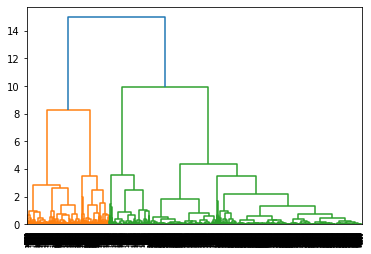

In [28]:
#Dendrogram
dendrogram=sch.dendrogram(sch.linkage(pca_data2, method='ward'))

In [117]:
#Поделба на податоците на train и test
train=df.iloc[:10050]
test=df.iloc[10050:]
train_index=train['index'].unique().tolist()
test_index=test['index'].unique().tolist

In [118]:
train_data=data[data['index'].isin(train_index)].reindex(train_index)
test_data=data[data['index'].isin(test_index)].reindex(test_index)

In [112]:
#Моделирање
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model=cluster.fit(pca_data2[0:10050])

cluster=model.fit_predict(pca_data2[10050:])
cluster1=model.fit_predict(pca_data2[0:10050])
test_data['Cluster Aglo']=cluster
train_data['Cluster Aglo']=cluster1

In [54]:
train_data.groupby(['Cluster Aglo','deposit']).size()

Cluster Aglo  deposit
0             no         2021
              yes        3007
1             no           88
              yes         124
2             no         2971
              yes           5
3             no          169
              yes         690
4             no           20
              yes         955
dtype: int64

In [55]:
test_data.groupby(['Cluster Aglo','deposit']).size()

Cluster Aglo  deposit
0             no         439
              yes          2
1             no           9
              yes         71
2             no         131
              yes        314
3             no           9
              yes          9
4             no          16
              yes        112
dtype: int64

In [125]:
#Ги лабелираме податоците во кластерите
train_data.loc[train_data["Cluster Aglo"].isin([1,2,3]), "Class"] = "Majority_Yes"
train_data.loc[train_data["Cluster Aglo"].isin([0,4]), "Class"] = "Majority_No"

test_data.loc[test_data["Cluster Aglo"].isin([0,2,4]), "Class"] = "Majority_Yes"
test_data.loc[test_data["Cluster Aglo"].isin([1,3]), "Class"] = "Majority_No"

## `Тестирање и прецизност на моделот`

In [128]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
test_data.loc[test_data.Class=='Majority_Yes', 'Klasa']=1
test_data.loc[test_data.Class=='Majority_No', 'Klasa']=0
test_data.Klasa=test_data.Klasa.astype(int)
test_data.loc[test_data.deposit=='yes', 'deposit']=1
test_data.loc[test_data.deposit=='no', 'deposit']=0

In [129]:
accuracy_score(test_data.Klasa, np.array(list(test_data.deposit)))

0.7805755395683454

In [130]:
confusion_matrix(test_data.Klasa, np.array(list(test_data.deposit)))

array([[361,  11],
       [233, 507]], dtype=int64)

In [131]:
print(classification_report(test_data.Klasa, np.array(list(test_data.deposit))))

              precision    recall  f1-score   support

           0       0.61      0.97      0.75       372
           1       0.98      0.69      0.81       740

    accuracy                           0.78      1112
   macro avg       0.79      0.83      0.78      1112
weighted avg       0.85      0.78      0.79      1112



## `Заклучок`

- Accuracy score на нашиот модел е 79%;
- Моделот има 98% прецизност, кога предвидува дека клиентот би орочил средства;
- За клиентите кои нема да орочат средства, моделот ги предвидува со 97% успешност;
- Главен недостаток на моделот е што прави погрешна класификација, на дури 40% од клиентите кои ги класифицира како клиенти кои нема да орочат средства. Во овој дел постои простор за зголемување на ефикасноста.

Базирано на резулатите од моделот и на анализата од оваа кампања, клиентите кои треба да бидат таргетирани, би требало да ги имаат следните карактеристики:

    - Да бидат на возраст помлади од 33 години или постари од 60
    - Да имаат состојба на сметка која ќе биде повисока од 1500 долари
    - Да немаат станбен кредит
    - Да имаат завршено најмалку средно образование
    - Кога ќе бидат контактирани, разговорите да бидат што пократки и поконцизни, но да траат барем 1 минута.
